# Capstone Project Car Accident Sevetity

## Introduction

### Key facts about Road Traffic Injuries
- Approximately 1.35 million people die each year as a result of road traffic crashes.
- The 2030 Agenda for Sustainable Development has set an ambitious target of halving the global number of deaths and injuries from road traffic crashes by 2020.
- Road traffic crashes cost most countries 3% of their gross domestic product.
- More than half of all road traffic deaths are among vulnerable road users: pedestrians, cyclists, and motorcyclists.
- 93% of the world's fatalities on the roads occur in low- and middle-income countries, even though these countries have approximately 60% of the world's vehicles.
- Road traffic injuries are the leading cause of death for children and young adults aged 5-29 years.

Every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.

[Source](https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries)

### What can be done to address road traffic injuries
Road traffic injuries can be prevented. Governments need to take action to address road safety holistically. This requires involvement from multiple sectors such as transport, police, health, education, and actions that address roads, vehicles, and road users' safety.

Effective interventions include designing safer infrastructure and incorporating road safety features into land-use and transport planning, improving vehicles' safety features, improving post-crash care for victims of road crashes, setting and enforcing laws relating to key risks, and raising public awareness.

By implementing road safety prediction applications, we can achieve several goals:
- Enlight for the local officials points where they need to assemble their resources for more effective service on the road.
- Implement road drivers warnings about road traffic conditions.
- Using predictive information for regulating speed limits on the road.

In conclusion, we will prevent incidents rather than spending resources on the treatment of their consequences.

## Data description

In this section we will download, study and transform our data provided by [Applied Data Science Capstone Course](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv).

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing data

In [83]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head(4)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N


In [84]:
df.shape

(194673, 38)

### Dropping data

We will drop several features that are not useful for future analysis:
- **OBJECTID.** As soon as we have only one table we do not need this ID.
- **INCKEY, COLDETKEY, REPORTNO, INTKEY.** This data might be useful for keeping database and investigatin each case apart, but useless for our analyzis.
- **STATUS, SDOTCOLNUM, SEGLANEKEY, CROSSWALKKEY.** Internal service information that does not contain a description of the feature.
- **EXCEPTRSNDESC.** This feature repeats EXCEPTRSNCODE so we can drop it.
- **SEVERITYCODE_1, SEVERITYDESC.** Because these repeat SEVERITYCODE.
- **INCDATE.** Because this feature conflicts with INCDTTM and contains suspiciously rounded timestamps.
- **JUNCTIONTYPE.** As we have ADDRTYPE and we drop EXCEPTRSNCODE rows we don't need this feature because it repeats ADDRTYPE.
- **SDOT_COLDESC.** This feature repeats SDOT_COLCODE so we can drop it.
- **ST_COLDESC.** This feature repeats ST_COLCODE so we can drop it.

We will keep several features because of their potential usefulness:
- **SEVERITYCODE.** This will be the main feature for our training process.
- **X and Y coordinates.** This features doesn't contain any real information because they copy **LOCATION** feature but they still be useful if we decide to implement Cluster map.
- **ADDRTYPE, LOCATION, COLLISIONTYPE, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, SDOT_COLCODE, INATTENTIONIND, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, PEDROWNOTGRNT, SPEEDING, ST_COLCODE, HITPARKEDCAR.** Might be useful for predicting accidents.
- **EXCEPTRSNCODE.** Might be useful for dropping rows, because this coulumn contains information where we do not have enough information about accident.
- **INCDTTM.** Might be useful for time-of-the-day prediction.

In [85]:
# find exact name of columns
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [86]:
# drop columns
df.drop(['OBJECTID','INCKEY', 'COLDETKEY', 'REPORTNO', 'INTKEY', 'STATUS', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'INCDATE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'ST_COLDESC'], axis=1, inplace=True)
df.head(4)

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,EXCEPTRSNCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,,Angles,2,0,0,...,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,Sideswipe,2,0,0,...,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,Parked Car,4,0,0,...,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,,Other,3,0,0,...,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N


Now we can clean dataset from rows where we do not have enough information about accident. EXCEPTRSNCODE feature can help us with it.

In [87]:
# cleaning dataset from rows where we do not have enough information about accident
df['EXCEPTRSNCODE'].replace(np.nan, "1", inplace=True)
df['EXCEPTRSNCODE'].replace("NEI", np.nan, inplace=True)
df.dropna(subset=['EXCEPTRSNCODE'], axis=0, inplace=True)
df.drop(['EXCEPTRSNCODE'], axis=1, inplace=True)
df.head(4)

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,...,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,...,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,...,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,...,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N


In [88]:
# checking what we did not drop much data
df.shape

(189035, 21)

Working with missing data in ADDRTYPE

In [89]:
# checking data
df['ADDRTYPE'].value_counts(dropna=False)

Block           123890
Intersection     64395
Alley              747
NaN                  3
Name: ADDRTYPE, dtype: int64

In [90]:
# cleaning dataset from rows where value is NaN
df.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)
df['ADDRTYPE'].value_counts(dropna=False)

Block           123890
Intersection     64395
Alley              747
Name: ADDRTYPE, dtype: int64

Working with missing data in LOCATION

In [91]:
# cleaning dataset from rows where value is NaN
df.dropna(subset=["LOCATION"], axis=0, inplace=True)
df.shape

(188285, 21)

Working with missing data in COLLISIONTYPE

In [92]:
# cleaning dataset from rows where value is NaN
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)
df.shape

(184156, 21)

Working with missing data in WEATHER

In [93]:
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.shape

(183975, 21)

Working with missing data in ROADCOND

In [94]:
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.shape

(183930, 21)

Working with missing data in LIGHTCOND

In [95]:
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df.shape

(183749, 21)

### Exploring the dataset

To explore the dataset let's plot several histogrames.

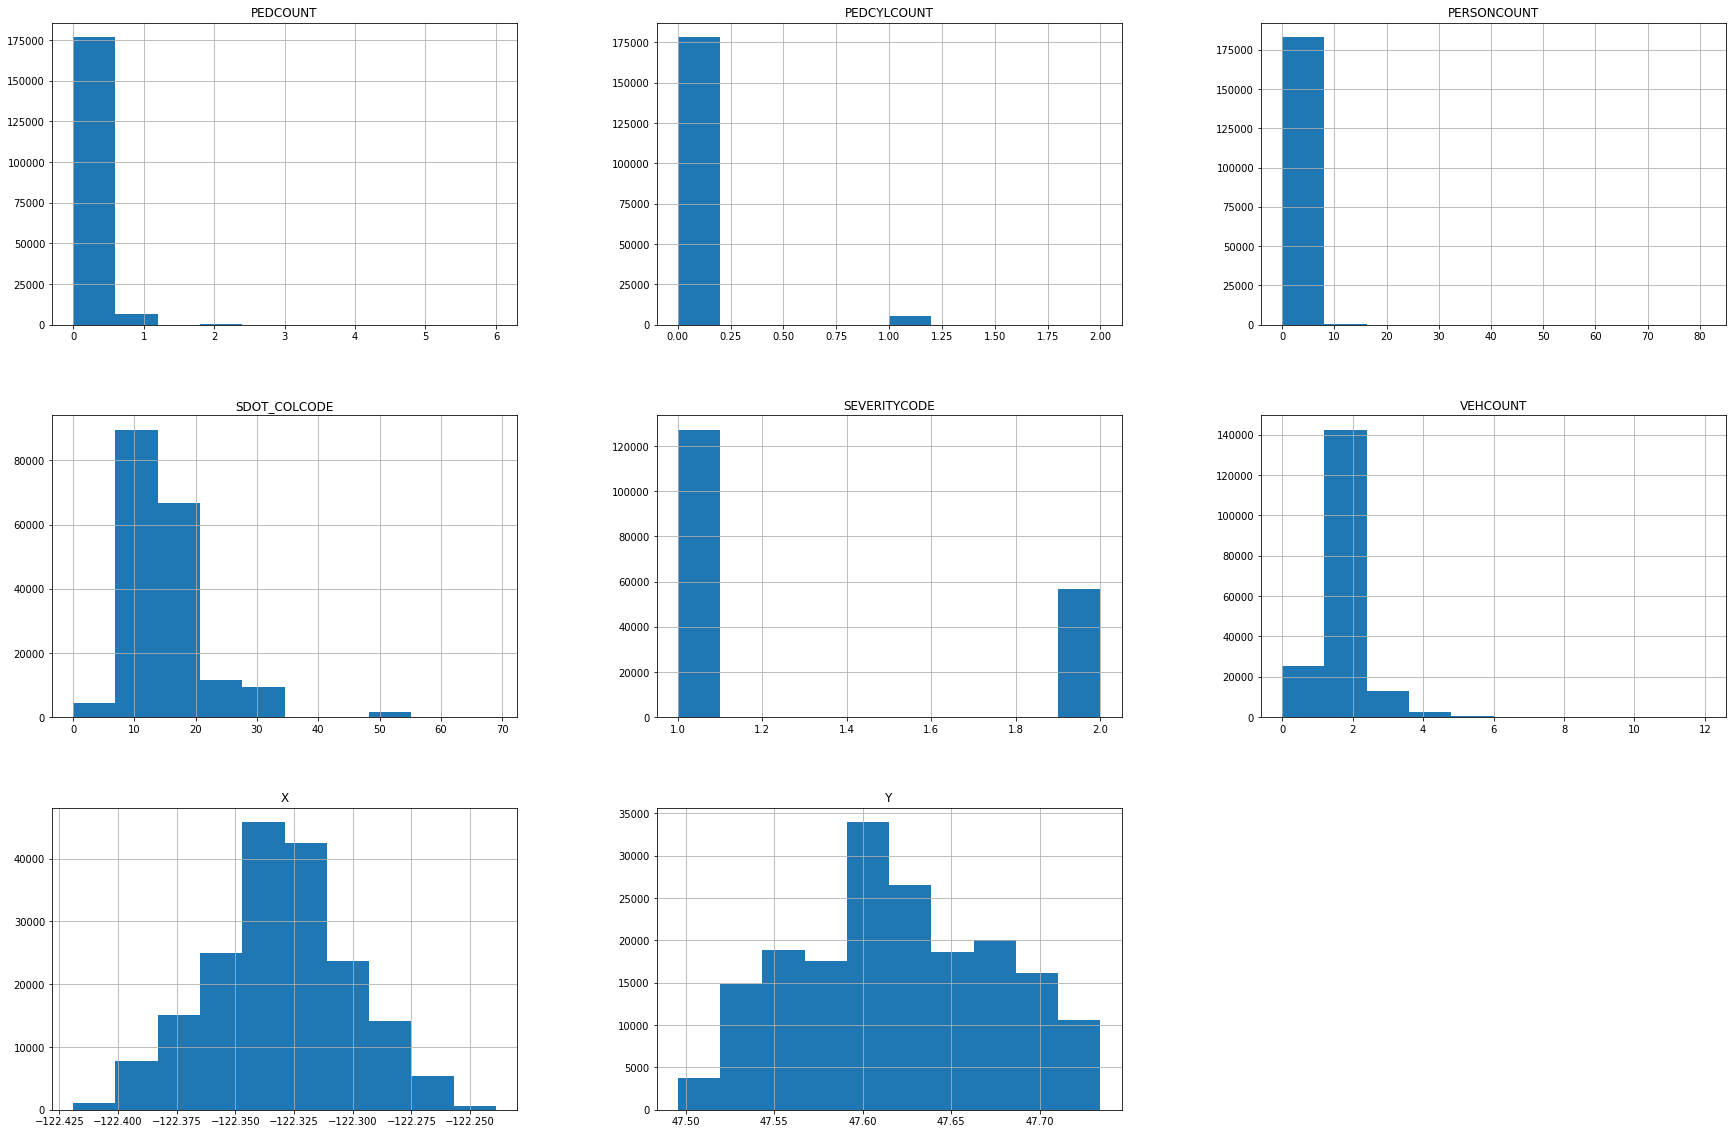

In [96]:
# we start with numeric data
df.hist(figsize=(30,20))
plt.show()

In [97]:
# checking COLLISIONTYPE
df['COLLISIONTYPE'].value_counts()

Parked Car    44301
Angles        34411
Rear Ended    33551
Other         22977
Sideswipe     18233
Left Turn     13619
Pedestrian     6431
Cycles         5312
Right Turn     2918
Head On        1996
Name: COLLISIONTYPE, dtype: int64

In [98]:
# checking COLLISIONTYPE with SEVERITYCODE
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts()

COLLISIONTYPE  SEVERITYCODE
Angles         1               20845
               2               13566
Cycles         2                4669
               1                 643
Head On        1                1128
               2                 868
Left Turn      1                8227
               2                5392
Other          1               16963
               2                6014
Parked Car     1               41667
               2                2634
Pedestrian     2                5780
               1                 651
Rear Ended     1               19037
               2               14514
Right Turn     1                2314
               2                 604
Sideswipe      1               15762
               2                2471
Name: SEVERITYCODE, dtype: int64

In [99]:
# checking PEDCOUNT with SEVERITYCODE
df.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts()

PEDCOUNT  SEVERITYCODE
0         1               126560
          2                50430
1         2                 5853
          1                  657
2         2                  202
          1                   19
3         2                   21
          1                    1
4         2                    4
5         2                    1
6         2                    1
Name: SEVERITYCODE, dtype: int64

In [100]:
# changing datetime
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDTTM']

0        2013-03-27 14:54:00
1        2006-12-20 18:55:00
2        2004-11-18 10:20:00
3        2013-03-29 09:26:00
4        2004-01-28 08:04:00
5        2019-04-20 17:42:00
6        2008-12-09 00:00:00
7        2020-04-15 17:47:00
8        2006-06-15 13:00:00
9        2006-03-20 15:49:00
11       2005-08-11 17:30:00
12       2006-05-17 12:51:00
13       2005-12-22 17:13:00
14       2013-03-31 02:09:00
16       2005-07-01 00:00:00
17       2004-01-16 08:25:00
18       2020-04-17 14:44:00
19       2009-06-01 00:00:00
20       2013-03-27 20:45:00
21       2013-03-28 16:22:00
22       2008-07-18 22:02:00
23       2004-09-12 06:20:00
24       2013-03-31 10:05:00
25       2019-04-25 09:40:00
26       2010-11-13 15:24:00
27       2007-07-23 16:30:00
28       2013-03-25 14:42:00
29       2006-11-16 11:00:00
30       2005-11-05 00:00:00
31       2004-07-21 15:12:00
                 ...        
194638   2019-01-19 15:35:00
194639   2018-12-13 07:49:00
194640   2018-11-28 17:14:00
194641   2018-

In [101]:
# exploring days of the week
df['DAYWEEK'] = df['INCDTTM'].dt.dayofweek
df.groupby(["DAYWEEK"])['SEVERITYCODE'].value_counts()

DAYWEEK  SEVERITYCODE
0        1               17000
         2                7735
1        1               18400
         2                8480
2        1               18591
         2                8495
3        1               18888
         2                8774
4        1               21210
         2                9265
5        1               18244
         2                7829
6        1               14904
         2                5934
Name: SEVERITYCODE, dtype: int64

In [102]:
# exploring WEATHER
df['WEATHER'].value_counts()

Clear                       109181
Raining                      32687
Overcast                     27287
Unknown                      12229
Snowing                        878
Other                          743
Fog/Smog/Smoke                 554
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               48
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [103]:
# dropping unknown WEATHER rows
df['WEATHER'].replace("Unknown", np.nan, inplace=True)
df.dropna(subset=['WEATHER'], axis=0, inplace=True)
df['WEATHER'].value_counts()

Clear                       109181
Raining                      32687
Overcast                     27287
Snowing                        878
Other                          743
Fog/Smog/Smoke                 554
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               48
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

## Methodology

### Replasing object types for modeling

We will use for our model features:
- ADDRTYPE
- PERSONCOUNT
- PEDCOUNT
- PEDCYLCOUNT
- VEHCOUNT
- WEATHER
- LIGHTCOND
- SPEEDING
- INATTENTIONIND
- UNDERINFL
- HITPARKEDCAR

But some of these features have object type. So the first step in modeling will be replacing data.

In [104]:
df['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'],value=[0,1,2],inplace=True)
df['WEATHER'].replace(to_replace=['Other','Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],value=[0,1,3,2,3,3,3,3,3,2],inplace=True)
df['LIGHTCOND'].replace(to_replace=['Other','Unknown','Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'],value=[0,0,1,3,2,2,4,4,4],inplace=True)
values = {'SPEEDING': 0, 'INATTENTIONIND': 0}
df=df.fillna(value=values)
df['SPEEDING'].replace(to_replace=['Y'],value=[1],inplace=True)
df['INATTENTIONIND'].replace(to_replace=['Y'],value=[1],inplace=True)
df['UNDERINFL'].replace(to_replace=['N','0','Y','1'],value=[0,0,1,1],inplace=True)
df['HITPARKEDCAR'].replace(to_replace=['N','Y'],value=[0,1],inplace=True)
df.shape

(171520, 22)

In [105]:
df_m=df[['SEVERITYCODE','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR']]
df_m=df_m.dropna(how='any')
df_m.reset_index(drop=True,inplace=True)
df_m.shape

(171520, 12)

### Feature Selection for Modeling

In [106]:
X=df_m[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR']]
X.reset_index(drop=True,inplace=True)

y = df_m['SEVERITYCODE'].values

print(X.head(4))
print(y[0:5])

   ADDRTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  WEATHER  LIGHTCOND  \
0         2            2         0            0         2        2          1   
1         1            2         0            0         2        3          3   
2         1            4         0            0         3        2          1   
3         1            3         0            0         3        1          1   

   SPEEDING  INATTENTIONIND  UNDERINFL  HITPARKEDCAR  
0         0               0          0             0  
1         0               0          0             0  
2         0               0          0             0  
3         0               0          0             0  
[2 1 1 1 2]


Splitting the data

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (137216, 11) (137216,)
Test set: (34304, 11) (34304,)


Fit the model

In [108]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth =5)
Tree.fit(X_train,y_train)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
yhat = Tree.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

## Results

In [110]:
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
print("Model Accuracy: ", metrics.accuracy_score(y_test, yhat))

Model Accuracy:  0.7308477145522388


In [111]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.72      0.98      0.83     23142
           2       0.82      0.22      0.35     11162

   micro avg       0.73      0.73      0.73     34304
   macro avg       0.77      0.60      0.59     34304
weighted avg       0.75      0.73      0.67     34304



## Conclusion

As we saw in data analisys block this dataset doesn't allow us to use any linear functions to predict road accidents severity. But still it is possible to build useful and informative models using Python and Decision Tree model. Even still, the model struggles from predicting accidents with high accuracy, so it might be needed to change dataset for implementing more reliable models.